<a href="https://colab.research.google.com/github/mad-havan/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


**Data Preprocessing**

In [28]:
cred_df=pd.read_csv('/content/creditcard.csv')

In [29]:
cred_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [30]:
cred_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [31]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286786 entries, 0 to 286785
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    286786 non-null  float64
 1   V1      286786 non-null  float64
 2   V2      286786 non-null  float64
 3   V3      286786 non-null  float64
 4   V4      286786 non-null  float64
 5   V5      286786 non-null  float64
 6   V6      286786 non-null  float64
 7   V7      286786 non-null  float64
 8   V8      286786 non-null  float64
 9   V9      286786 non-null  float64
 10  V10     286786 non-null  float64
 11  V11     286786 non-null  float64
 12  V12     286786 non-null  float64
 13  V13     286786 non-null  float64
 14  V14     286786 non-null  float64
 15  V15     286786 non-null  float64
 16  V16     286786 non-null  float64
 17  V17     286786 non-null  float64
 18  V18     286786 non-null  float64
 19  V19     286786 non-null  float64
 20  V20     286786 non-null  float64
 21  V21     28

In [32]:
cred_df.shape

(286786, 31)

In [33]:
cred_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,286786.000000,286786.000000,286786.000000,286786.000000,286786.000000,286786.000000,286786.000000,286786.000000,286786.000000,286786.000000,...,286786.000000,286786.000000,286786.000000,286786.000000,286786.000000,286786.000000,286785.000000,286785.000000,286785.000000,286785.000000
mean,94715.254074,-0.001909,0.001891,0.004041,0.000818,-0.001834,0.000012,-0.000575,0.001072,-0.001708,...,-0.000434,-0.001056,-0.000292,0.000084,0.000838,0.000249,-0.000185,-0.000056,88.241791,0.001716
std,47338.799028,1.956573,1.649526,1.514457,1.414435,1.378532,1.331216,1.235092,1.194299,1.097686,...,0.733561,0.725123,0.623121,0.605653,0.521376,0.482268,0.403285,0.329446,249.693892,0.041384
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54409.250000,-0.921517,-0.597061,-0.883793,-0.847235,-0.692496,-0.767803,-0.554080,-0.207835,-0.643914,...,-0.228339,-0.542700,-0.161872,-0.354466,-0.316115,-0.326968,-0.070847,-0.052880,5.550000,0.000000
50%,84304.500000,0.016510,0.067099,0.184169,-0.018005,-0.056572,-0.273917,0.039633,0.022816,-0.052784,...,-0.029784,0.005500,-0.011389,0.041116,0.017697,-0.052086,0.001358,0.011369,22.000000,0.000000
75%,139114.000000,1.313152,0.804985,1.029747,0.745424,0.609605,0.398197,0.569500,0.328225,0.594798,...,0.185765,0.526552,0.147159,0.439021,0.351218,0.241255,0.090905,0.078219,77.050000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,13.710000,3.517346,31.612198,33.847808,25691.160000,1.000000


In [34]:
cred_df['Class'].value_counts()

0.0    286293
1.0       492
Name: Class, dtype: int64

In [ ]:
# from above values its clear that the dataset is unbalanced so we have to balance the dataset

In [35]:
cred_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,94739.307199,0.006296,-0.004328,0.016128,-0.006989,0.003570,0.002421,0.008997,0.000093,0.002727,...,-0.000418,-0.001661,-0.001084,-0.000220,0.000264,0.000721,0.000161,-0.000479,-0.000186,88.183414
1.0,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


0 -> Normal Transaction

1 -> Fraudent transaction

In [36]:
legit=cred_df[cred_df.Class==0]
fraud=cred_df[cred_df.Class==1]
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [37]:
legit.shape

(286293, 31)

In [38]:
fraud.shape

(492, 31)

In [39]:
legit['Amount'].describe()

count    286293.000000
mean         88.183414
std         249.678195
min           0.000000
25%           5.610000
50%          22.000000
75%          77.000000
max       25691.160000
Name: Amount, dtype: float64

In [40]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Handling Imbalanced Dataset**

In [41]:
legit_sample=legit.sample(n=492)

In [42]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
111665,72319.0,-1.196188,0.537000,1.825278,-1.315210,-0.321422,0.303635,-0.168451,0.588849,-0.090356,...,0.253313,0.460510,-0.326992,-0.922239,0.365625,1.091279,-0.150640,-0.030049,60.75,0.0
120009,75678.0,-0.650080,1.188027,1.279089,0.046970,-0.049677,-0.738305,0.584391,0.095265,-0.119809,...,-0.254869,-0.594694,0.091589,0.324928,-0.245594,0.089165,0.366579,0.156258,5.36,0.0
238505,148847.0,0.089026,0.727174,-0.342897,-0.475203,0.730248,-1.123150,1.609935,-0.416511,-0.180495,...,0.100529,0.385080,-0.127304,-0.084861,0.163049,-0.291625,0.020693,0.032140,61.48,0.0
233804,146941.0,-1.132771,1.011542,0.885066,-1.207293,-0.241540,-0.051649,0.016625,0.328554,0.824769,...,-0.107887,-0.441910,-0.020644,-0.530119,-0.252318,-0.332645,-0.726474,-0.203254,2.00,0.0
282668,169686.0,-1.159475,1.964268,-1.484967,-0.326515,0.299145,-0.368454,-0.183755,1.086584,-0.412265,...,0.194683,0.255914,0.002070,-0.042660,-0.532789,-0.410818,-0.394399,0.059041,3.27,0.0


In [43]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
281842,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1.0
282122,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1.0
282128,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1.0
283123,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1.0
283653,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1.0


In [44]:
new_dataset['Class'].value_counts()

0.0    492
1.0    492
Name: Class, dtype: int64

In [45]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,95233.489837,0.051335,0.023587,-0.025194,-0.079065,0.044962,0.081631,-0.017775,-0.036393,0.089845,...,0.034123,-0.007203,0.027967,-0.015720,0.001582,0.036815,0.017993,-0.023245,-0.004947,84.437927
1.0,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Splitting train and test data**

In [46]:
X=new_dataset.drop(['Class'],axis=1)

In [47]:
Y=new_dataset['Class']

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [49]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [50]:
standard=scaler.transform(X)
X=standard

In [51]:
print(X)

[[-0.32262622  0.21141273 -0.34818105 ... -0.22001419 -0.14813684
  -0.17468873]
 [-0.25347357  0.31059    -0.17201077 ...  0.28731074  0.27380679
  -0.40196047]
 [ 1.25287666  0.4448172  -0.29671934 ... -0.05195837 -0.00729268
  -0.17169346]
 ...
 [ 1.67499812  0.30585687 -0.18869649 ...  0.30548516  0.36010188
  -0.10436128]
 [ 1.68765929 -0.13684573 -0.33495834 ...  0.7956932  -0.6546564
   0.58131087]
 [ 1.69552363  0.79040725 -0.45061121 ... -0.06932515 -0.11475374
  -0.24944755]]


**Model Training**

In [52]:
model=LogisticRegression()

In [53]:
model.fit(X_train,Y_train)

LogisticRegression()

In [54]:
train_pred=model.predict(X_train)
accuracy=accuracy_score(train_pred,Y_train)
print("Accuracy of training data:",accuracy)


Accuracy of training data: 0.9275730622617535


**Model Evaluation**

Accuracy of testing data: 0.9644670050761421


<Axes: >

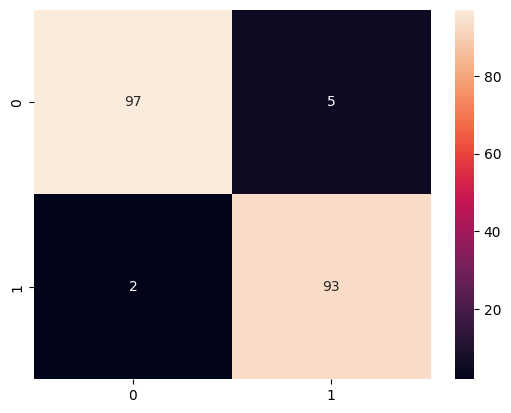

In [55]:
test_pred=model.predict(X_test)
accuracy=accuracy_score(test_pred,Y_test)
print("Accuracy of testing data:",accuracy)
cn=confusion_matrix(test_pred,Y_test)
sns.heatmap(cn,annot=True)


In [56]:
print(classification_report(test_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       102
         1.0       0.95      0.98      0.96        95

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



**Using RandomForest Classifier**

In [57]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [58]:
train_pred=model.predict(X_train)
accuracy=accuracy_score(train_pred,Y_train)
print("Accuracy of training data:",accuracy)


Accuracy of training data: 1.0


Accuracy of testing data: 0.9644670050761421


<Axes: >

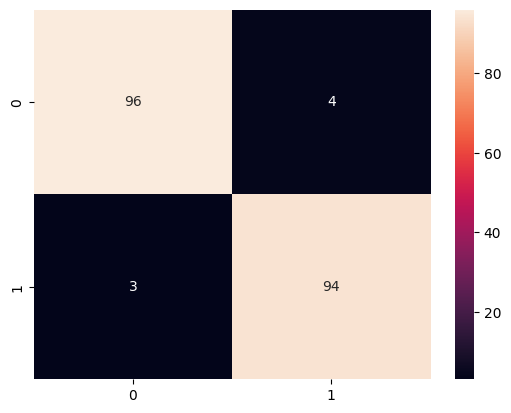

In [59]:
test_pred=model.predict(X_test)
accuracy=accuracy_score(test_pred,Y_test)
print("Accuracy of testing data:",accuracy)
cn=confusion_matrix(test_pred,Y_test)
sns.heatmap(cn,annot=True)


In [60]:
print(classification_report(test_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       100
         1.0       0.96      0.97      0.96        97

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

